<a href="https://colab.research.google.com/github/1ee1hee/Deep_Learning/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cifar10_CNN

In [1]:
# matplotlib 한글 폰트 적용
# 다운로드
! sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 런타임 다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,740 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

## 데이터 로딩

In [4]:
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
train_image.shape, test_image.shape, train_label.shape, test_label.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [6]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
class_names = np.array(['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭'])

<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  plt.tight_layout()
<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  plt.tight_layout()
<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 47085 (\N{HANGUL SYLLABLE REOG}) missing from current font.
  plt.tight_layout()
<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 49844 (\N{HANGUL SYLLABLE SEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-8-144601dc9299>:9: UserWarning: Glyph 51088 (\N{HANGUL 

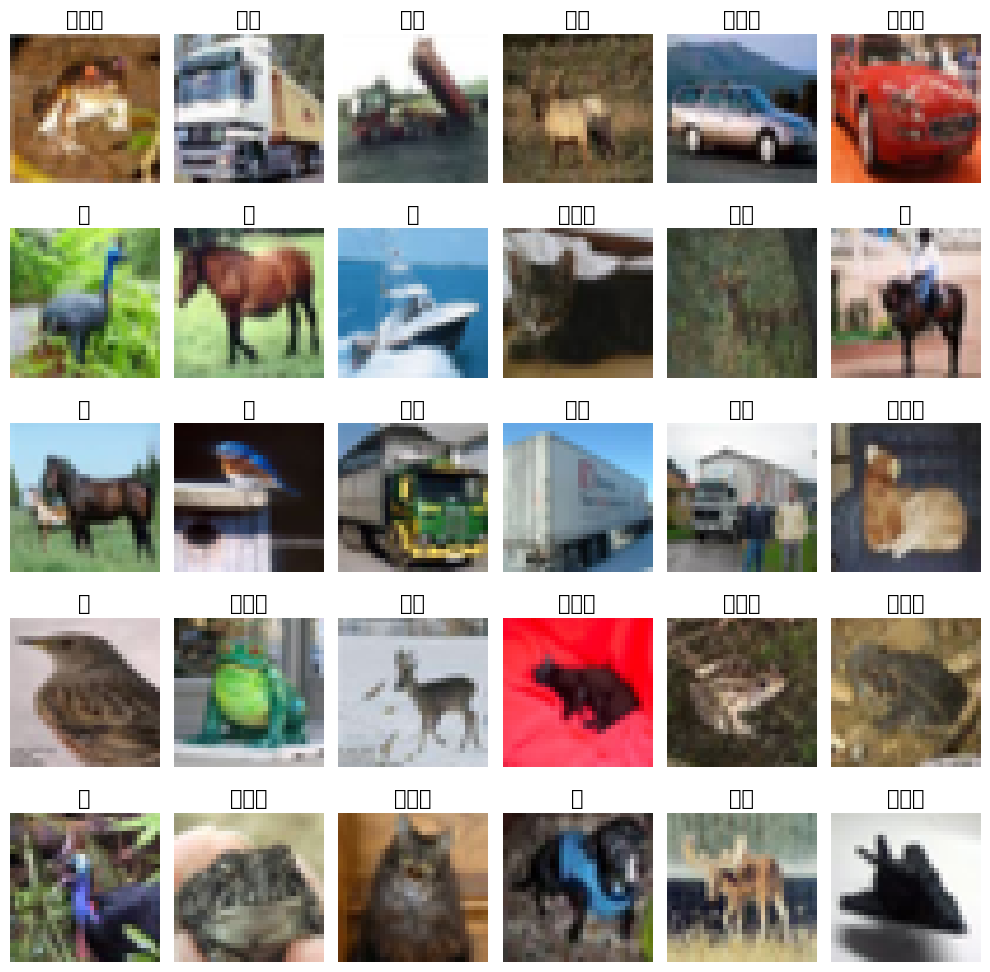

In [8]:
# 이미지 확인
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(train_image[i])
    plt.title(class_names[train_label[i, 0]], fontsize = 15)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 데이터 전처리
- X: 0 ~ 1 scaling
- y: onehot encoding

In [9]:
X_train = train_image.astype(np.float32)/255.0
X_test = test_image.astype(np.float32)/255.0

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

np.min(X_train), np.max(X_train), y_train.shape, y_test.shape

(0.0, 1.0, (50000, 10), (10000, 10))

## 하이퍼파라미터, 변수 정의

In [10]:
LEARNING_RATE = 0.001
N_EPOCHS = 200
N_BATCHS = 10000

N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]
IMAGE_SIZE = 32

## Dataset 생성
- train/test set

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder = True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

## 모델 생성 및 컴파일
- CNN 모델을 이용해 10개의 class를 분류하는 모델을 구현

In [12]:
def create_cifar10_model():
    model = keras.Sequential()

    model.add(layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

    model.add(layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=10, activation='softmax'))

    return model

In [13]:
model = create_cifar10_model()
model.compile(optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 64)        0

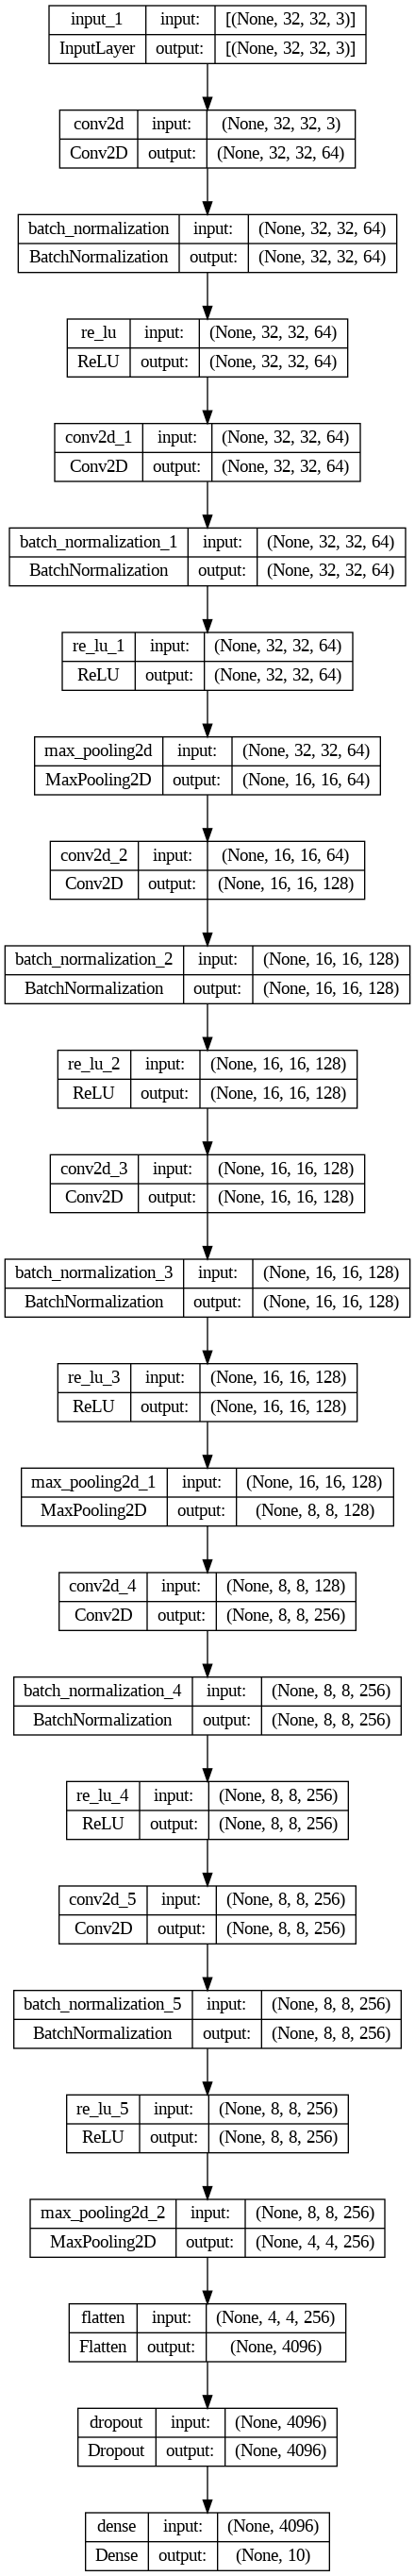

In [15]:
keras.utils.plot_model(model, show_shapes = True)

## 학습 및 평가
- callback을 이용해 early stopping, 가장 성능 좋았을때 모델 저장
    - 모델은 자신의 google drive에 저장
    - 저장한 모델을 loading 후 모델 평가

In [16]:
import os
base_dir = '/content/drive/MyDrive/github'
save_dir = os.path.join(base_dir, 'saved_models2', 'cifa10_model')
print(save_dir)

/content/drive/MyDrive/github/saved_models2/cifa10_model


In [17]:
# callback 생성
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

mc_callback = keras.callbacks.ModelCheckpoint(filepath = save_dir,
                                              save_best_only = True,
                                              monitor = 'val_loss',
                                              verbose = 1)

In [ ]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data = test_dataset, callbacks = [es_callback, mc_callback])

Epoch 1/200


## loss/accuracy 시각화 함수

In [ ]:
# loss 그래프
def plot_loss(history):
    plt.plot(history.epoch, history.history['loss'], label='Train loss')
    plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# accuracy 그래프
def plot_accuracy(history):
    plt.plot(history.epoch, history.history['accuracy'], label='Train accuracy')
    plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlael('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [ ]:
plot_loss(hist)

In [ ]:
plot_accuracy(hist)

## 저장된 모델 로딩 및 평가

In [ ]:
load_model = keras.models.load_model(save_dir)

In [ ]:
loss, accuracy = load_model.evaluate(test_dataset)

In [ ]:
loss, accuracy